Explore the data and visualize any patterns or new findings

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

yelp_data_unpacked = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yelp_data_unpacked.csv')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Review Data

In [ ]:
yelp_data_unpacked.head()

,Alias,Name,Rating,Price,City,Zip_code,Address,Review
0,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'The chocolate cups are amazing! Have been eat...
1,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Morris Park Bake Shop has become my go to spo...
2,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I thought the cookies and biscotti were prett...
3,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Guys.... so Im a big time biscotti connoisseu...
4,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I had a craving for a special type of cake wi...


The first metric we're going to look at is the word count for each review

In [ ]:
yelp_data_unpacked['Review_Word_Count'] = yelp_data_unpacked['Review'].apply(lambda x: len(str(x).split()))

Text(0, 0.5, 'Number of Words')

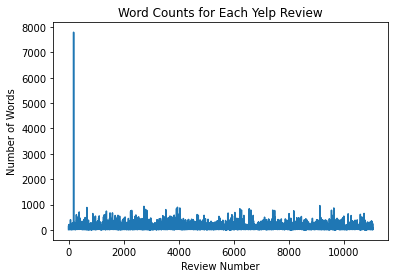

In [ ]:
yelp_data_unpacked['Review_Word_Count'].plot()
plt.title('Word Counts for Each Yelp Review')
plt.xlabel('Review Number')
plt.ylabel('Number of Words')

Most reviews are under 1000 words except for one outlier

In [ ]:
yelp_data_unpacked[yelp_data_unpacked['Review_Word_Count'] > 1000]

,Alias,Name,Rating,Price,City,Zip_code,Address,Review,Review_Word_Count
184,riviera-caterers-brooklyn,Riviera Caterers,4.5,NaN,Brooklyn,11224,2780 Stillwell Ave,'Got a question about Riviera Caterers? Ask th...,7791


In [ ]:
long_review = yelp_data_unpacked[yelp_data_unpacked['Review_Word_Count'] > 1000]['Review'][184]
long_review

'\'Got a question about Riviera Caterers? Ask the Yelp community!, I had my wedding here a month ago and I would give Riviera10 stars if I could. It was such a joy and ease to work with Adam, Tommy, and their staff. A true diamond in the rough of Coney Island and the best value out there for Brooklyn weddings! Extremely recommend this place.First, the space has been recently remodeled and it is truly gorgeous and modern. You dont have to worry about bringing in much of your own decorations - our florals, ceremony, table settings, and photos looked stunning against the Rivieras backdrop.The service of the Riviera staff was also impeccable. Up to the wedding, they were responsive and helpful and kind. During our wedding, the staff took extreme care of us and our guests, and over-checked on us every step of the way. I felt very taken care of. At the end of the night, waiters had trays of water waiting for everyone as they headed home from the party. They even put champagne in the bathroom

Let us make that review short

In [ ]:
new_review = str(long_review).replace('Got a question about Riviera Caterers? Ask the Yelp community!,','')   

In [ ]:
yelp_data_unpacked = yelp_data_unpacked.replace(long_review,new_review)

In [ ]:
yelp_data_unpacked[yelp_data_unpacked['Review_Word_Count'] > 1000]['Review'][184][0:100]

"' I had my wedding here a month ago and I would give Riviera10 stars if I could. It was such a joy a"

## Removing Stop Words<a id='Removing_Stop_Words'></a>

Stop words like 'the', 'a', 'for', or 'so' don't really have much meaning for sentiment analysis. Removing them is an important step to improve overall efficiency

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


example_sent = """This is a sample sentence,
                  showing off the stop words filtration."""

stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(example_sent)
 
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


Now we can apply this to our reviews dataset, first we're going to add some more columns to make the analysis easier, one column will be for lowercase reviews and the other will be for lowercase and no punctuation

In [ ]:
yelp_data_unpacked['Lowercase'] = yelp_data_unpacked['Review'].apply(lambda x: ' '.join(word.lower() for word in str(x).split()))

In [ ]:
yelp_data_unpacked['Cleaned'] = yelp_data_unpacked['Lowercase'].str.replace('[^\w\s]', '')

In [ ]:
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

Reviews_noStopWords = []

for i in range(len(yelp_data_unpacked)):
    
    review = str(yelp_data_unpacked['Cleaned'][i])
    review = review
    review = review.lower()
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(review)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    
    Reviews_noStopWords.append(filtered_sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
yelp_data_unpacked['No_Stop_Words:Tokens'] = Reviews_noStopWords

In [ ]:
yelp_data_unpacked['No_Stop_Words:Sentence'] = Reviews_noStopWords
for i in range(len(yelp_data_unpacked)): 
    text_list = yelp_data_unpacked['No_Stop_Words:Tokens'][i]
    blank = ''
    for word in text_list:
        blank = blank+' '+word
    yelp_data_unpacked['No_Stop_Words:Sentence'][i] = blank

Now lets see how many words from the original review are stop words

In [ ]:
Stop_Word_Count = []
for i in range(len(yelp_data_unpacked)):
    review = str(yelp_data_unpacked['Review'][i]).lower()
    count = 0
    for word in review.split():
        if word in stop_words:
            count += 1
    Stop_Word_Count.append(count)

yelp_data_unpacked['Stop_Word_Count'] = Stop_Word_Count

We could plot this but I believe it will look similar to the word count plot due to that 8000 word review, let's calculate the percentage of stop words instead and plot that

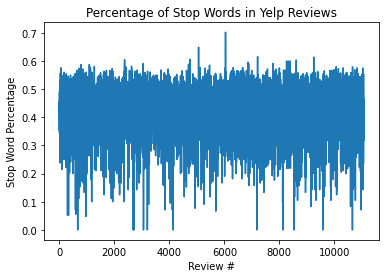

In [ ]:
full = yelp_data_unpacked['Review_Word_Count']
partial = yelp_data_unpacked['Stop_Word_Count']

yelp_data_unpacked['Stop_Words_%'] = partial/full
yelp_data_unpacked['Stop_Words_%'].plot()
plt.title('Percentage of Stop Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Stop Word Percentage');

Looks like most reviews are around 55% stop words, lets look at that one outlier near 70% though

In [ ]:
yelp_data_unpacked[yelp_data_unpacked['Stop_Words_%'] > 0.65]['Review'][6043]

"'I have been coming to this restaurant for years. I am so happy to see that it is still here after all we have been through with Covid. If you have not been here you should be. It has great good. The soup is sooo very good."

Looks like a normal review, lets take a look at the other extreme where the reviews are near 0% stop words

In [ ]:
yelp_data_unpacked[yelp_data_unpacked['Stop_Words_%'] < 0.05]['Review'][4136]

"'Awesome cheap food! Good Ambience decently priced drinks"

This person used 0 stop words

## Word Clouds<a id='Word_Clouds'></a>

Now that we don't have stop words we can generate a word cloud that won't have any filler words - this will make the more frequently used words that have meaning stand out more as opposed to seeing only stop words

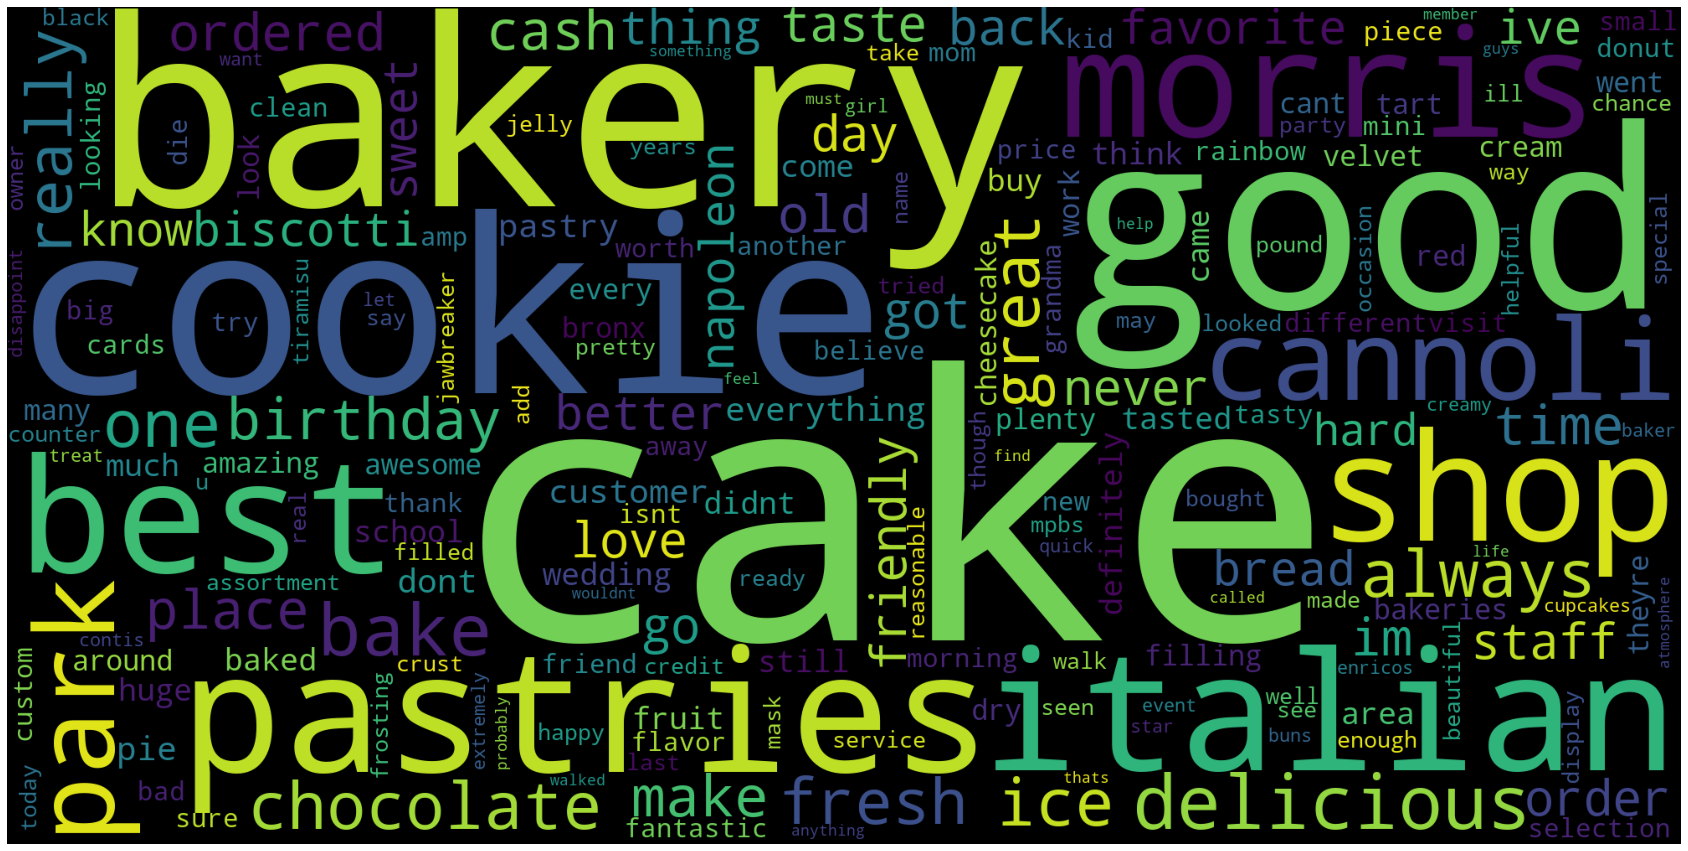

In [ ]:
import matplotlib.pyplot as plt

def get_all_text(location):
    all_words = ''
    for i in range(len(yelp_data_unpacked['Name'])):
        if yelp_data_unpacked['Name'][i] == location:
            words = yelp_data_unpacked['No_Stop_Words:Tokens'][i]
            blank = ''
            for word in words:
                blank = blank+' '+word
            all_words = all_words + ' '+blank            
    return all_words


text = get_all_text("Morris Park Bake Shop")


from wordcloud import WordCloud
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, colormap='viridis', collocations=False).generate(text)
plt.figure(figsize=(30, 20))
plt.imshow(wordcloud) 
plt.axis("off");

## Stemming and Lemmatization<a id='Stem_and_Lem'></a>

Stemming is an important part of Natural Language Processing, it basically removes all the suffixes from each word variety and leaves the root word.
This makes the reviews have less unique words which will help when we're counting the frequency of sentiment words

Lemmatization makes sure that each word is consistently formatted but unlike stemming it doesn't make the text unreadable.

In [ ]:
import textblob
from textblob import Word
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
yelp_data_unpacked['Lemmatized'] = yelp_data_unpacked['No_Stop_Words:Sentence'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))

In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer

snowBallStemmer = SnowballStemmer("english")

sentence = yelp_data_unpacked['Lemmatized'][40]
wordList = nltk.word_tokenize(sentence)

stemWords = [snowBallStemmer.stem(word) for word in wordList]

stemmed = ' '.join(stemWords)
print(sentence)
print('')
print(stemmed)

awesome bake shop huge variety pastry mini cake ordered napoleon chocolate mouse black white cookie black white cookie bit dry however napoleon chocolate mouse amazing napoleon different one normally bakery usually theyre filled sum kinda bavaraian eclair type cream one filled taste like vanilla pudding great mini cake 150 piece 3 piece put scale price extremely reasonable well

awesom bake shop huge varieti pastri mini cake order napoleon chocol mous black white cooki black white cooki bit dri howev napoleon chocol mous amaz napoleon differ one normal bakeri usual theyr fill sum kinda bavaraian eclair type cream one fill tast like vanilla pud great mini cake 150 piec 3 piec put scale price extrem reason well


Now we can tokenize these stemmed sentences

In [ ]:
import re
def word_extraction(sentence):   
    words = re.sub("[^\w]", " ",  sentence).split()    
    cleaned_text = [w.lower() for w in words]    
    return cleaned_text

In [ ]:
stemmed_list = []
stemmed_tokens_list = []
for i in range(len(yelp_data_unpacked)):
    sentence = yelp_data_unpacked['Lemmatized'][i]
    wordList = nltk.word_tokenize(sentence)
    stemWords = [snowBallStemmer.stem(word) for word in wordList]
    
    stemmed = ' '.join(stemWords)
    stemmed_list.append(stemmed)

In [ ]:
yelp_data_unpacked['Stemmed:Sentence'] = stemmed_list

In [ ]:
for i in range(len(yelp_data_unpacked)):
    stemmed = yelp_data_unpacked['Stemmed:Sentence'][i]
    tokens = word_extraction(stemmed)
    stemmed_tokens_list.append(tokens)

In [ ]:
yelp_data_unpacked['Stemmed:Tokens'] = stemmed_tokens_list

In [ ]:
yelp_data_unpacked['Stemmed:Tokens'][1]

['morri',
 'park',
 'bake',
 'shop',
 'becom',
 'go',
 'spot',
 'atmospher',
 'place',
 'great',
 'invit',
 'love',
 'everi',
 'thing',
 'order',
 'staff',
 'realli',
 'pleasant',
 'definit',
 'help',
 'anyth',
 'definit',
 'come',
 'back',
 'morri',
 'park',
 'bake',
 'shop']

In [ ]:
yelp_data_unpacked['Stemmed_Word_Count'] = yelp_data_unpacked['Stemmed:Sentence'].apply(lambda x: len(str(x).split()))

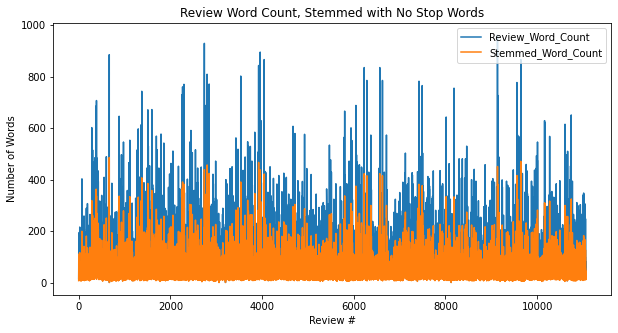

In [ ]:
plt.figure(figsize=(10,5))
yelp_data_unpacked[yelp_data_unpacked['Review_Word_Count']< 2000]['Review_Word_Count'].plot()
yelp_data_unpacked[yelp_data_unpacked['Stemmed_Word_Count']< 1000]['Stemmed_Word_Count'].plot()
plt.title('Review Word Count, Stemmed with No Stop Words')
plt.xlabel('Review #')
plt.ylabel('Number of Words')
plt.legend()

Stemming makes a significant impact when it comes to total word count, especially on those longer reviews

In [ ]:
from textblob import TextBlob
bad_review = list(yelp_data_unpacked[yelp_data_unpacked['Rating'] < 2.5]['Name'])[0]
bad_index = list(yelp_data_unpacked['Name'].unique()).index(bad_review)
yelp_data_unpacked['Polarity'] = yelp_data_unpacked['Lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])
pol = yelp_data_unpacked[yelp_data_unpacked['Name'] == bad_review]['Polarity'].mean()
pol

0.0027986017182523486

We now have a much better understanding of our data and have several metrics to use while working with these reviews. We know the total number of words, how many of those words are stop words.

Moving forward it'll be good to determine whether or not we want to make multiple categories, like a five star system or to just stick with positive and negative, if we go with the first option we need to figure our where the cutoff for a 4 star vs a 5 star might be among other things

In [ ]:
yelp_data_unpacked.columns

Index(['Alias', 'Name', 'Rating', 'Price', 'City', 'Zip_code', 'Address',
       'Review', 'Review_Word_Count', 'Lowercase', 'Cleaned',
       'No_Stop_Words:Tokens', 'No_Stop_Words:Sentence', 'Stop_Word_Count',
       'Stop_Words_%', 'Lemmatized', 'Stemmed:Sentence', 'Stemmed:Tokens',
       'Stemmed_Word_Count', 'Polarity'],
      dtype='object')

In [ ]:
yelp_data_analyzed = yelp_data_unpacked[['Alias', 'Name', 'Rating', 'Price', 'City', 'Zip_code', 'Address',
       'Review', 'Review_Word_Count', 'No_Stop_Words:Tokens', 'No_Stop_Words:Sentence',
       'Stop_Word_Count', 'Stop_Words_%', 'Lemmatized', 'Stemmed:Sentence',
       'Stemmed:Tokens','Stemmed_Word_Count', 'Polarity']]

In [ ]:
yelp_data_analyzed.head()

,Alias,Name,Rating,Price,City,Zip_code,Address,Review,Review_Word_Count,No_Stop_Words:Tokens,No_Stop_Words:Sentence,Stop_Word_Count,Stop_Words_%,Lemmatized,Stemmed:Sentence,Stemmed:Tokens,Stemmed_Word_Count,Polarity
0,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'The chocolate cups are amazing! Have been eat...,16,"[chocolate, cups, amazing, eating, years, alwa...",chocolate cups amazing eating years always ta...,7,0.437500,chocolate cup amazing eating year always taste...,chocol cup amaz eat year alway tast fantast,"[chocol, cup, amaz, eat, year, alway, tast, fa...",8,0.500000
1,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Morris Park Bake Shop has become my go to spo...,49,"[morris, park, bake, shop, become, go, spot, a...",morris park bake shop become go spot atmosphe...,20,0.408163,morris park bake shop become go spot atmospher...,morri park bake shop becom go spot atmospher p...,"[morri, park, bake, shop, becom, go, spot, atm...",28,0.338889
2,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I thought the cookies and biscotti were prett...,122,"[thought, cookies, biscotti, pretty, good, def...",thought cookies biscotti pretty good definite...,53,0.434426,thought cooky biscotti pretty good definitely ...,thought cooki biscotti pretti good definit tas...,"[thought, cooki, biscotti, pretti, good, defin...",61,0.314583
3,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Guys.... so Im a big time biscotti connoisseu...,169,"[guys, im, big, time, biscotti, connoisseur, a...",guys im big time biscotti connoisseur always ...,75,0.443787,guy im big time biscotti connoisseur always hu...,guy im big time biscotti connoisseur alway hun...,"[guy, im, big, time, biscotti, connoisseur, al...",90,0.238068
4,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I had a craving for a special type of cake wi...,59,"[craving, special, type, cake, ice, cream, lay...",craving special type cake ice cream layer reg...,27,0.457627,craving special type cake ice cream layer regu...,crave special type cake ice cream layer regula...,"[crave, special, type, cake, ice, cream, layer...",30,0.314643


## Categorization and Dummy Variables

We need to categorize our data into groups that our model can sort by. In this case, because we're doing a sentiment analysis, we're going to sort our data into 'positive' and 'negative' sentiment reviews

In [ ]:
yelp_data_s = yelp_data_analyzed[yelp_data_analyzed['Polarity'] != 0]
yelp_data_s = yelp_data_s.reset_index()


In [ ]:
sentiment = []
for i in range(len(yelp_data_s)):
    if yelp_data_s['Polarity'][i] >= 0.4:
        sentiment.append('Positive')
    if yelp_data_s['Polarity'][i] > 0.2 and yelp_data_s['Polarity'][i] < 0.4:
        sentiment.append('Slightly Positive')
    if yelp_data_s['Polarity'][i] <= 0.2 and yelp_data_s['Polarity'][i] > 0:
        sentiment.append('Slightly Negative')
    if yelp_data_s['Polarity'][i] < 0:
        sentiment.append('Negative')
yelp_data_s['sentiment'] = sentiment

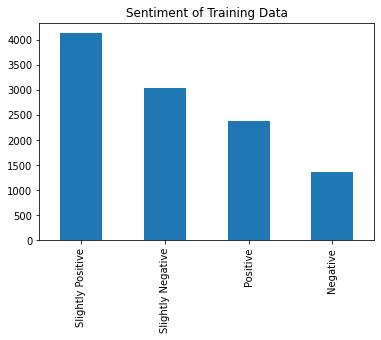

In [ ]:
yelp_data_s['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment of Training Data');

In [ ]:
yelp_data_s = yelp_data_s.rename(columns={'Stop_Words_%':'Stop_Words_P'})

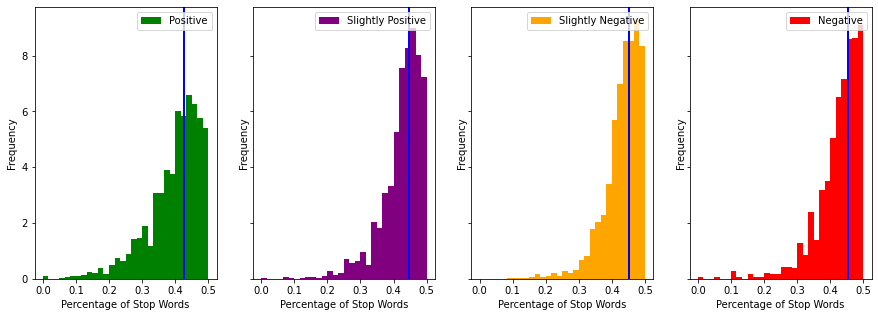

In [ ]:
fig, axs = plt.subplots(1, 4, figsize = (15,5), sharex = True, sharey = True)
axs[0].hist(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Stop_Words_P, bins = 30, density = True, range = (0,0.5), color = 'green', label = "Positive")
axs[0].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Stop_Words_P), color = 'b', lw = 2, )
axs[0].legend(loc="upper right")

axs[1].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Stop_Words_P, bins = 30, density = True, range = (0,0.5), color = 'purple', label = "Slightly Positive")
axs[1].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Stop_Words_P), color = 'b', lw = 2, )
axs[1].legend(loc="upper right")

axs[2].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Stop_Words_P, bins = 30, density = True, range = (0,0.5), color = 'orange', label = "Slightly Negative")
axs[2].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Stop_Words_P), color = 'b', lw = 2, )
axs[2].legend(loc="upper right")

axs[3].hist(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Stop_Words_P, bins = 30, density = True, range = (0,0.5), color = 'red', label = "Negative")
axs[3].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Stop_Words_P), color = 'b', lw = 2, )
axs[3].legend(loc="upper right")

for ax in axs.flat:
    ax.set(xlabel='Percentage of Stop Words', ylabel='Frequency')
plt.show()

Now that we have out data categorized we're going to need to converted our tokenized reviews into word vectors using  CountVectorizer

The CountVectorizer uses the bag of words approach to convert text to word counts and, more importantly, a vector. The vector for each word, paragraph, or sentence can then be compared to other vectors and we can see which ones are the most similar.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text = yelp_data_s['No_Stop_Words:Sentence'][0:2]
vectorizer = CountVectorizer()
vectorizer.fit(text)
vector = vectorizer.transform(text)

#summary
print('List of unique Words: ',vectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',vector.shape)
print('')
print(vector.toarray())

List of unique Words:  {'chocolate': 7, 'cups': 9, 'amazing': 1, 'eating': 11, 'years': 30, 'always': 0, 'taste': 28, 'fantastic': 13, 'morris': 19, 'park': 21, 'bake': 5, 'shop': 25, 'become': 6, 'go': 14, 'spot': 26, 'atmosphere': 3, 'place': 22, 'great': 15, 'inviting': 17, 'love': 18, 'every': 12, 'thing': 29, 'ordered': 20, 'staff': 27, 'really': 24, 'pleasant': 23, 'definitely': 10, 'help': 16, 'anything': 2, 'come': 8, 'back': 4}

Shape of the Sparse Matrix  (2, 31)

[[1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 1 1 1 2 1 0 1 0 2 0 1 0 1 1 1 1 1 2 1 2 1 1 1 2 1 1 0 1 0]]


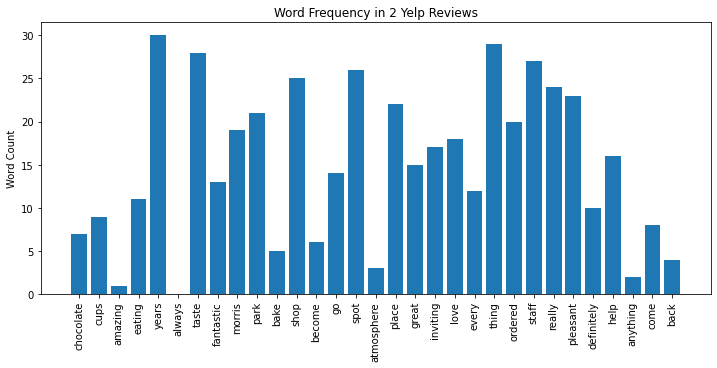

In [ ]:
lists = vectorizer.vocabulary_.items() # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize=(12,5))
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.title('Word Frequency in 2 Yelp Reviews')
plt.ylabel('Word Count')
plt.show()

# Lets Create the Training Dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = yelp_data_s['Stemmed:Sentence']
Tvectorizer = TfidfVectorizer()
Tvectorizer.fit(text)
Tvector = Tvectorizer.transform(text)
voc = Tvectorizer.vocabulary_
df = pd.DataFrame(Tvector.toarray(),columns=voc)

col_name1 ='Name'
col_name2 = 'Review'
col_name3 = 'Polarity'
col_name4 = 'Sentiment'

col1 = yelp_data_s['Name']
col2 = yelp_data_s['Review']
col3 = yelp_data_s['Polarity']
col4 = yelp_data_s['sentiment']

df.insert(0,col_name1,col1)
df.insert(1,col_name2,col2)
df.insert(2,col_name3,col3)
df.insert(3,col_name4,col4)

In [ ]:
morDf = df[df['Name'] == "Morris Park Bake Shop"]

In [ ]:
print(morDf.iloc[15]['Polarity'])
print('Sentiment:', morDf.iloc[15]['Sentiment'])

0.425
Sentiment: Positive


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split


X = df.iloc[0:,4:]
y = df.Sentiment

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0,test_size=0.2)


In [ ]:
df.head()

,Name,Review,Polarity,Sentiment,chocol,cup,amaz,eat,year,alway,...,turnt,twoiv,combowhich,fishscallopscalamarishrimpfri,quicki,goesnic,outsidehad,perfections,trueif,fashionth
0,Morris Park Bake Shop,'The chocolate cups are amazing! Have been eat...,0.500000,Positive,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Morris Park Bake Shop,'Morris Park Bake Shop has become my go to spo...,0.338889,Slightly Positive,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Morris Park Bake Shop,'I thought the cookies and biscotti were prett...,0.314583,Slightly Positive,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Morris Park Bake Shop,'Guys.... so Im a big time biscotti connoisseu...,0.238068,Slightly Positive,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Morris Park Bake Shop,'I had a craving for a special type of cake wi...,0.314643,Slightly Positive,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.to_csv(r'yelp_data_sentiment.csv',index=False)